In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import json
import pandas_profiling
from numpy import array

import quandl
quandl_api = 'YDy5xD85FUyhACHzsunX'
quandl.ApiConfig.api_key = 'YDy5xD85FUyhACHzsunX'


import eia
api = eia.API('aeb9ba252acba96a087cdd98626d5fc2')


# Importing Data from Quandl and Energy Information Administration #

##### Quandl: ### 

<a href="https://www.quandl.com/data/UICT-United-Nations-Information-and-Communication-Technology?keyword=internet%20use" target="_blank">*Percent of Population Connected to Internet*</a>


##### Energy Information Administration: ###

<a href="https://www.eia.gov/international/data/world/electricity/electricity-consumption?pd=2&p=0000002&u=0&f=A&v=mapbubble&a=-&i=none&vo=value&&t=C&g=00000000000000000000000000000000000000000000000001&l=249-ruvvvvvfvtvnvv1vrvvvvfvvvvvvfvvvou20evvvvvvvvvvnvvvs0008&s=315532800000&e=1546300800000" target="_blank">*Total Electricity Consumption*</a>


<a href="https://www.eia.gov/international/data/world/total-energy/total-energy-consumption?pd=44&p=0000000010000000000000000000000000000000000000000000000000u06&u=0&f=A&v=mapbubble&a=-&i=none&vo=value&&t=C&g=00000000000000000000000000000000000000000000000001&l=249-ruvvvvvfvtvnvv1vrvvvvfvvvvvvfvvvou20evvvvvvvvvvnvvvs0008&s=315532800000&e=1514764800000" target="_blank">*Total Energy Consumption*</a>


<a href="https://www.eia.gov/international/data/world/other-statistics/population-by-country?pd=4702&p=000000000000000000000000000000000000000000000000000000001&u=0&f=A&v=mapbubble&a=-&i=none&vo=value&t=C&g=00000000000000000000000000000000000000000000000001&l=249-ruvvvvvfvtvnvv1vrvvvvfvvvvvvfvvvou20evvvvvvvvvvnvvvs0008&s=315532800000&e=1546300800000&" target="_blank">*Total Population*</a>



## Generating Country Codes for API calls  #

In [2]:
#Manually entered country codes from Quandl dataset as a list. 
q_country_codes = ['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 
'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'PRK', 'DNK', 
'COD', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB',
'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN',
'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MDG', 'MYS', 'MDV', 'MLT', 'MHL', 'MWI', 'MRT', 'MLI', 'MUS', 'MEX', 'FSM', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU',
'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'NIU', 'NOR', 'OMN', 'PAK', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'KOR', 'MDA', 'ROU', 'RUS', 'RWA',
'KNA', 'LCA', 'VCT', 'WSM', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'SSD', 'ESP', 'LKA', 'SDN', 'SUR', 'SWZ', 'SWE', 
'CHE', 'SYR', 'TJK', 'THA', 'MKD', 'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TUV', 'UGA', 'UKR', 'ARE', 'GBR', 'TZA', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM',
'YEM', 'ZMB', 'ZWE']


#Manually entered country codes from EIA dataset as a list.
eia_country_codes = ['AFG','ALB','DZA','ASM','AGO','ATA','ATG','ARG','ARM','ABW','AUS','AUT','AZE','BHR',
 'BGD','BRB','BLR','BEL','BLZ','BEN','BMU','BTN','BOL','BIH','BWA','BRA','VGB','BRN','BGR','BFA','MMR','BDI','CPV',
 'KHM','CMR','CAN','CYM','CAF','TCD','CHL','CHN','COL','COM','COG','COD','COK','CRI','HRV','CUB','CYP','CZE','CIV',
 'DNK','DJI','DMA','DOM','ECU','EGY','SLV','GNQ','ERI','EST','SWZ','ETH','FLK','FRO','FJI','FIN','CSK','SCG','SUN',
 'YUG','FRA','GUF','PYF','GAB','GMB','GEO','DEU','DDR','DEU','GHA','GIB','GRC','GRL','GRD','GLP','GUM','GTM','GIN',
 'GNB','GUY','HTI','HIT','HND','HKG','HUN','ISL','IND','IDN','IRN','IRQ','IRL','ISR','ITA','JAM','JPN','JOR','KAZ',
 'KEN','KIR','XKS', 'KWT','KGZ','LAO','LVA','LBN','LSO','LBR','LBY','LTU','LUX','MAC','MDG','MWI','MYS''MDV','MLI',
 'MLT','MTQ','MRT','MUS','MEX','MDA','MNG','MNE','MSR','MAR','MOZ','NAM','NRU''NPL','NLD','NLD','NCL','NZL','NIC',
 'NER','NGA','NIU','PRK','MKD','NOR','OMN','PAK','PSE','PAN','PNG','PRY','PER','PHL','POL','PRT','PRI','QAT','REU',
 'ROU','RUS','RWA','SHN','KNA','LCA','SPM','VCT','WSM','STP','SAU','SEN','SRB','SYC','SLE','SGP','SVK','SVN','SLB',
 'SOM','ZAF','KOR','SSD','ESP','LKA','SDN','SUR','SWE','CHE','SYR','TWN','TJK','TZA','THA','BHS','TLS','TGO','TON',
 'TTO','TUN','TUR','TKM','TCA','USI','VIR','UGA','UKR','ARE','GBR','USA','URY','UZB','VUT','VEN','VNM','WAK','ESH',
 'YEM','ZMB','ZWE','ZMB','ZWE']


#Do the two country_code lists have the same number of values?
print('q_country_codes:' + str(len(q_country_codes)))
print('eia_country_codes:' + str(len(eia_country_codes)))

q_country_codes:195
eia_country_codes:226


In [3]:
#Determining which codes are in q_country_codes that are not in eia_country_codes.
test_list1 = np.setdiff1d(q_country_codes, eia_country_codes)
print(test_list1)
print('Codes in q_country_codes that are not in eia_country_codes: ' + str(len(test_list1)) + '\n')


#Determining which codes are in eia_country_codes that are not in country_codes.
test_list2 = np.setdiff1d(eia_country_codes, q_country_codes)
print(test_list2)
print('Codes in eia_country_codes that are not in q_country_codes: ' + str(len(test_list2)) + '\n')

#Convert the lists to a list dtype and then combine to create list of country codes to remove.
test_list1 = test_list1.tolist()
test_list2 = test_list2.tolist()
remove_list = test_list1 + test_list2
print(remove_list)
print('Total country codes to remove: ' + str(len(remove_list)))

['AND' 'FSM' 'MCO' 'MDV' 'MHL' 'MYS' 'NPL' 'NRU' 'PLW' 'SMR' 'TUV']
Codes in q_country_codes that are not in eia_country_codes: 11

['ABW' 'ASM' 'ATA' 'BMU' 'CSK' 'CYM' 'DDR' 'ESH' 'FLK' 'FRO' 'GIB' 'GLP'
 'GRL' 'GUF' 'GUM' 'HIT' 'MAC' 'MSR' 'MTQ' 'MYSMDV' 'NCL' 'NRUNPL' 'PRI'
 'PSE' 'PYF' 'REU' 'SCG' 'SHN' 'SPM' 'SUN' 'TCA' 'TWN' 'USI' 'VGB' 'VIR'
 'WAK' 'XKS' 'YUG']
Codes in eia_country_codes that are not in q_country_codes: 38

['AND', 'FSM', 'MCO', 'MDV', 'MHL', 'MYS', 'NPL', 'NRU', 'PLW', 'SMR', 'TUV', 'ABW', 'ASM', 'ATA', 'BMU', 'CSK', 'CYM', 'DDR', 'ESH', 'FLK', 'FRO', 'GIB', 'GLP', 'GRL', 'GUF', 'GUM', 'HIT', 'MAC', 'MSR', 'MTQ', 'MYSMDV', 'NCL', 'NRUNPL', 'PRI', 'PSE', 'PYF', 'REU', 'SCG', 'SHN', 'SPM', 'SUN', 'TCA', 'TWN', 'USI', 'VGB', 'VIR', 'WAK', 'XKS', 'YUG']
Total country codes to remove: 49


In [4]:
final_country_codes = q_country_codes

for element in remove_list:
    if element in final_country_codes:
        final_country_codes.remove(element)

print(final_country_codes)
print(len(final_country_codes))

['AFG', 'ALB', 'DZA', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'PRK', 'DNK', 'COD', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MDG', 'MLT', 'MWI', 'MRT', 'MLI', 'MUS', 'MEX', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'NIU', 'NOR', 'OMN', 'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'KOR', 'MDA', 'ROU', 'RUS', 'RWA', 'KNA', 'LCA', 'VCT', 'WSM', 'STP', 'SAU', 'SEN', 'SRB'

## Quandl Internet Usage Data Import  #

In [5]:
#Created a for loop to append country codes with the Quandl database code 'UICT/INT_'.
q_appended_country_codes = []

for country in final_country_codes:
    q_appended_country_codes.append('UICT/INT_' + str(country))
    
    
#Imported data for each country into one dataframe.
internet_df = quandl.get(q_appended_country_codes, authtoken= "YDy5xD85FUyhACHzsunX")


#Changed column names to country codes.
internet_df.columns = q_country_codes


#Dropped rows so that dataframe starts at 1990.
internet_df = internet_df.drop(internet_df.index[0:18])


#Set internet_df index as the year.
internet_df = internet_df.set_index(pd.DatetimeIndex(internet_df.index).year)

In [6]:
internet_df.head(25)

,AFG,ALB,DZA,AGO,ATG,ARG,ARM,AUS,AUT,AZE,...,TZA,USA,URY,UZB,VUT,VEN,VNM,YEM,ZMB,ZWE
Date,,,,,,,,,,,,,,,,,,,,,
1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.585095,0.130369,0.000000,...,0.000000,0.784729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097204,0.259082,NaN,...,NaN,1.163194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,0.002993,NaN,1.768765,0.642818,NaN,...,NaN,1.724203,NaN,NaN,NaN,0.012082,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,0.029527,NaN,1.974611,0.765343,NaN,...,NaN,2.271673,NaN,NaN,NaN,0.041587,NaN,NaN,NaN,NaN
1994,NaN,NaN,0.000361,NaN,NaN,0.043706,0.009117,2.232101,1.393423,0.001431,...,NaN,4.862781,0.062474,NaN,NaN,0.055487,NaN,NaN,0.006776,0.001739
1995,NaN,0.011169,0.001769,NaN,2.200769,0.086277,0.052743,2.759655,1.890211,0.002056,...,NaN,9.237088,0.310129,0.001527,NaN,0.122215,NaN,NaN,0.008784,0.007684
1996,NaN,0.032197,0.001739,0.000776,2.858450,0.141955,0.094573,3.275250,6.909162,0.006355,...,0.001622,16.419353,1.847472,0.004285,0.056846,0.248261,0.000135,0.000621,0.009069,0.016790
1997,NaN,0.048594,0.010268,0.005674,3.480537,0.280340,0.111651,16.369358,9.533974,0.025188,...,0.007900,21.616401,3.363240,0.010537,0.139506,0.390959,0.003982,0.015025,0.009330,0.033080
1998,NaN,0.065027,0.020239,0.018454,4.071716,0.830767,0.128659,30.813239,15.421219,0.037485,...,0.009244,30.093197,6.987069,0.020754,0.274186,1.383990,0.013079,0.023323,0.030226,0.081648


## Energy Information Administration Data Import

### Electricity Consumption Data


In [7]:
#Created a for loop to append country codes with EIA API call code
eia_appended_country_codes = []

for country in final_country_codes:
    eia_appended_country_codes.append('INTL.2-2-' + str(country) + '-BKWH.A')

In [8]:
#Imported data for each country into one dataframe.
electricity_df = []

for i in range(len(eia_appended_country_codes)):
    
        url = 'http://api.eia.gov/series/?api_key=aeb9ba252acba96a087cdd98626d5fc2&series_id=' + eia_appended_country_codes[i]

        r = requests.get(url)
        json_data = r.json()

        df = pd.DataFrame(json_data.get('series')[0].get('data'), columns = ['Date', eia_appended_country_codes[i]])

        df.set_index('Date', drop=True, inplace = True)
        df.sort_index(ascending=True)

        electricity_df.append(df)
        
electricity_df = pd.concat(electricity_df, axis=1)

In [9]:
#Reversing the index order so it starts with 1980.
electricity_df = electricity_df.loc[::-1]

#Simplifying column names
electricity_df.columns = final_country_codes

#Dropped rows so that dataframe starts at 1990 and ends at 2014.
electricity_df = electricity_df.drop(electricity_df.index[0:11])

electricity_df = electricity_df.drop(electricity_df.index[-4::])

electricity_df.head(25)

,AFG,ALB,DZA,AGO,ATG,ARG,ARM,AUS,AUT,AZE,...,TZA,USA,URY,UZB,VUT,VEN,VNM,YEM,ZMB,ZWE
1990,1.021140,1.65900,12.73400,0.95800,0.082770,37.10500,--,135.40400,44.30500,--,...,1.36700,2837.083605,5.09100,--,0.022320,46.92800,6.26300,1.37100,6.050000,9.94800
1991,1.044770,1.71500,13.03400,0.89900,0.082770,39.65500,--,137.99600,47.24200,--,...,1.47900,2886.060219,4.10700,--,0.023250,49.45100,6.70800,1.36300,5.958000,9.41800
1992,0.768050,1.44300,14.03500,1.01300,0.082770,45.29200,6.358,140.13300,47.10700,15.248,...,1.41500,2897.206690,4.20100,42.796,0.025110,53.23000,6.94400,1.41900,5.988000,8.30000
1993,0.729610,1.72700,14.03900,1.06200,0.082770,48.40700,3.724,143.98800,46.18300,14.334,...,1.39900,3000.700217,4.54000,41.703,0.025110,54.59400,7.85700,1.44000,5.980000,8.77300
1994,0.750170,2.01700,14.36500,1.07100,0.084630,49.93400,3.273,147.50200,46.87100,14.594,...,1.33000,3080.888198,4.73300,40.553,0.025110,55.20300,9.23100,1.62000,5.954000,8.20000
1995,0.685440,2.15200,14.47400,1.07400,0.085560,54.93800,2.858,152.33400,47.94500,13.724,...,1.55800,3163.963129,5.04000,39.473,0.026040,56.17000,11.13500,1.71400,6.138000,8.49000
1996,0.620570,2.79000,15.17200,1.08500,0.085560,57.92800,3.486,156.54600,49.72500,13.614,...,1.79600,3253.765041,5.11200,40.047,0.027900,57.84200,13.26400,1.64600,5.683000,8.79300
1997,0.564070,2.08400,15.36500,1.21600,0.086490,62.78000,4.281,161.72100,50.32200,14.12,...,1.57600,3301.849323,5.59100,40.489,0.030690,59.84800,15.08400,1.74000,6.525000,9.55900
1998,0.527800,2.20000,16.90500,1.32800,0.088350,67.90800,3.671,172.08800,51.11800,14.76,...,2.21300,3425.096635,6.34300,40.343,0.032550,61.17100,17.43300,1.64700,6.253000,9.01300
1999,0.523150,3.48200,18.49200,1.10600,0.088350,70.43000,3.88,176.17700,52.33600,15.118,...,1.81200,3483.716365,6.20100,39.961,0.032550,59.93200,19.29500,1.67400,5.909000,9.67600


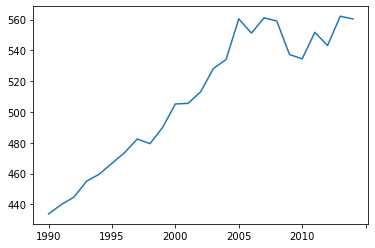

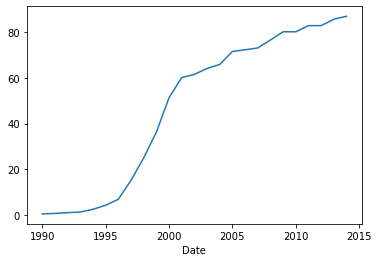

In [23]:
electricity_df['CAN'].plot()
plt.show()

internet_df['CAN'].plot()
plt.show()

### Energy Consumption Data

### Population Data